## Name: Nguyen Minh Huy Duong
### Assignment 1 Bonus

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [2]:
# Importing the dataset
dataset = pd.read_csv("fashion_mnist1.csv")
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [3]:
U, S, Vt = svd(X, full_matrices=False)

In [4]:
PC1 = U[:, 0] * S[0]
PC2 = U[:, 1] * S[1]

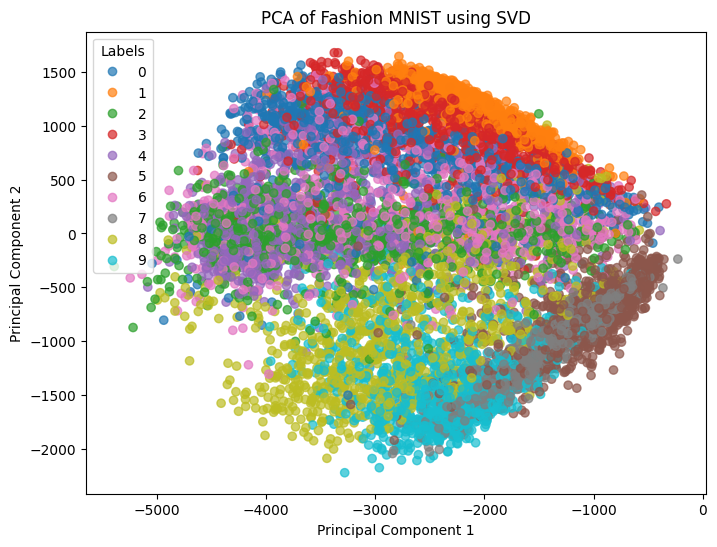

In [5]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(PC1, PC2, c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Labels")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST using SVD')
plt.show()

### Question 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute Pairwise Distances in High-Dimensional Space
def compute_pairwise_distances(X):
    sum_X = np.sum(np.square(X), axis=1)
    dist_matrix = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    return dist_matrix

# Step 2: Convert Distances to Affinities using Gaussian Kernel for High-Dimensional Space
def compute_high_dim_affinities(X, sigma=1.0):
    # Compute pairwise distances
    dist_matrix = compute_pairwise_distances(X)
    
    # Compute Gaussian similarities
    P = np.exp(-dist_matrix / (2 * sigma**2))
    
    # Normalize affinities
    P /= np.sum(P, axis=1, keepdims=True)
    return P

# Step 3: Compute Low-Dimensional Affinities using t-Distribution
def compute_low_dim_affinities(Y):
    # Compute pairwise distances in 2D space
    dist_matrix = compute_pairwise_distances(Y)
    
    # t-SNE uses a t-distribution with 1 degree of freedom
    Q = 1 / (1 + dist_matrix)
    
    # Normalize affinities
    Q /= np.sum(Q, axis=1, keepdims=True)
    return Q

# Step 4: Gradient Descent to Minimize KL Divergence
def gradient_descent(X, n_components=2, n_iter=1000, learning_rate=0.1):
    # Initialize random 2D positions for each point
    np.random.seed(0)
    Y = np.random.randn(X.shape[0], n_components)
    
    # Compute high-dimensional affinities
    P = compute_high_dim_affinities(X)
    
    for i in range(n_iter):
        # Compute low-dimensional affinities
        Q = compute_low_dim_affinities(Y)
        
        # Compute gradient (simplified version)
        gradient = np.dot((P - Q).T, Y)
        
        # Update Y positions using gradient descent
        Y += learning_rate * gradient
    
    return Y

# Step 5: Load Data
data = pd.read_csv('fashion_mnist1.csv')

# Separate labels and features
y = data.iloc[:, 0]    # Labels
X = data.iloc[:, 1:]   # Features

# Run t-SNE using gradient descent
Y = gradient_descent(X)

# Step 6: Plot the result
plt.figure(figsize=(8,6))
scatter = plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Labels")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Fashion MNIST')
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (10000, 10000) instead